This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

# functions to import observation data
from Functions_ImportData import import_filtered_NOAA_obs
from Functions_ImportData import import_gorongosa_obs_pr
# functions to import modelled and bias corrected data
from Functions_ImportData import import_BC_NOAA_NEX_GDDP_CMIP6
from Functions_ImportData import import_BC_Gorongosa_NEX_GDDP_CMIP6

from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import boxplots_
from Graphs_functions import compare_3_lines

# Import data

## Observations data

### Precipitation and temperature NOAA

In [2]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [3]:
daily_sum_obs_from_NOAA['TMAX']

0         29.0
1         27.0
2          NaN
3          NaN
4          NaN
          ... 
137721     NaN
137722     NaN
137723     NaN
137724     NaN
137725     NaN
Name: TMAX, Length: 137726, dtype: float64

In [4]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'NAME','BEIRA, MZ')

In [5]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'NAME','PEMBA, MZ')

In [6]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'NAME','CHIMOIO, MZ')

In [7]:
daily_sum_obs_from_NOAA_CHIMOIO

STATION         NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
2689   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-01   
2690   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-02   
2691   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-03   
2692   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-04   
2693   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-05   
...            ...          ...       ...        ...        ...         ...   
14159  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-27   
14160  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-28   
14161  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-29   
14162  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-30   
14163  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-31   

       PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMAX_ATTRIBUTES  TMIN  \
2689    0.4             ,,Q   NaN             NaN  ...              ,,Q  20.7   
2690    0.0             ,,Q   NaN             NaN  ...              ,,Q  21.2   
2691    0.0             ,,Q   NaN             NaN  ...              ,,Q  20.5   
2692    0.0             ,,Q   NaN             NaN  ...              ,,Q  19.2   
2693    0.0             ,,Q   NaN             NaN  ...              ,,Q  20.2   
...     ...             ...   ...             ...  ...              ...   ...   
14159   NaN             NaN  24.9            H,,S  ...              NaN  21.8   
14160   NaN             NaN  25.9            H,,S  ...              ,,S  20.0   
14161  23.1             ,,S  24.3            H,,S  ...              ,,S  20.9   
14162  45.0             ,,S  22.9            H,,S  ...              ,,S  21.0   
14163  33.0             ,,S  21.6            H,,S  ...              NaN  20.4   

       TMIN_ATTRIBUTES  Year  Month Season PRCP MISSING  TAVG MISSING  \
2689               ,,Q  1970    Jan  Humid            0             1   
2690               ,,Q  1970    Jan  Humid            0             1   
2691               ,,Q  1970    Jan  Humid            0             1   
2692               ,,Q  1970    Jan  Humid            0             1   
2693               ,,Q  1970    Jan  Humid            0             1   
...                ...   ...    ...    ...          ...           ...   
14159              ,,S  2014    Dec  Humid            1             0   
14160              ,,S  2014    Dec  Humid            1             0   
14161              ,,S  2014    Dec  Humid            0             0   
14162              ,,S  2014    Dec  Humid            0             0   
14163              ,,S  2014    Dec  Humid            0             0   

       TMAX MISSING  TMIN MISSING  
2689              0             0  
2690              0             0  
2691              0             0  
2692              0             0  
2693              0             0  
...             ...           ...  
14159             1             0  
14160             0             0  
14161             0             0  
14162             0             0  
14163             1             0  

[11475 rows x 21 columns]

### Precipitation from Gorongosa 

In [8]:
pr_obs_gorongosa_from_gorongosa = import_gorongosa_obs_pr()

In [9]:
pr_obs_gorongosa_from_gorongosa_to_comp = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1970,2014)]

## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

#### Past

In [10]:
# to compare historic modelisation with NOAA observation data at the same emplacement
pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past = import_BC_NOAA_NEX_GDDP_CMIP6('pr',1970,2014)
pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA=select_station(pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','BEIRA, MZ')
pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO=select_station(pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','CHIMOIO, MZ')

#### Past project

In [11]:
pr_model_BC_NEX_GDDPCMIP6_past_project = import_BC_NOAA_NEX_GDDP_CMIP6('pr',1970,2014,EmplacementStationNOAA='no')
pr_model_BC_NEX_GDDPCMIP6_past_Gorongosa=select_station(pr_model_BC_NEX_GDDPCMIP6_past_project,'Name project','Gorongosa_EIB')

In [12]:
# modelled data at gorongosa emplacement, corrected with gorongosa observation data
pr_model_BC_Gorongosa=import_BC_Gorongosa_NEX_GDDP_CMIP6(1980,2014)

### Temperature NEX-GDDP-CMIP6

#### Past

In [13]:
# to compare with NOAA observation data
tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past = import_BC_NOAA_NEX_GDDP_CMIP6('tas',1970,2014)
tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA=select_station(tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','BEIRA, MZ')
tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO=select_station(tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','CHIMOIO, MZ')

### Maximum temperature NEX-GDDP-CMIP6

In [14]:
# to compare with NOAA observation data
tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past = import_BC_NOAA_NEX_GDDP_CMIP6('tasmax',1970,2014)
tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA=select_station(tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','BEIRA, MZ')
tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO=select_station(tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','CHIMOIO, MZ')

### Minimum temperature NEX GDDP CMIP6

In [15]:
# to compare with NOAA observation data
tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past = import_BC_NOAA_NEX_GDDP_CMIP6('tasmin',1970,2014)
tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA=select_station(tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','BEIRA, MZ')
tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO=select_station(tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past,'Name project','CHIMOIO, MZ')

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

In [16]:
# beira

In [17]:
daily_sum_obs_from_NOAA_BEIRA

STATION       NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
123007  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-01   
123008  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-02   
123009  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-03   
123010  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-04   
123011  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-05   
...             ...        ...       ...        ...        ...         ...   
137721  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-27   
137722  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-28   
137723  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-29   
137724  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-30   
137725  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-31   

        PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMAX_ATTRIBUTES  \
123007   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123008   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123009   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123010   2.5             ,,Q   NaN             NaN  ...              ,,Q   
123011  10.3             ,,Q   NaN             NaN  ...              ,,Q   
...      ...             ...   ...             ...  ...              ...   
137721   NaN             NaN  30.8            H,,S  ...              NaN   
137722   NaN             NaN  30.0            H,,S  ...              NaN   
137723   NaN             NaN  28.0            H,,S  ...              NaN   
137724   NaN             NaN  25.6            H,,S  ...              NaN   
137725   4.1             ,,S  27.2            H,,S  ...              NaN   

        TMIN  TMIN_ATTRIBUTES  Year  Month Season PRCP MISSING  TAVG MISSING  \
123007  23.8              ,,Q  1970    Jan  Humid            0             1   
123008  25.2              ,,Q  1970    Jan  Humid            0             1   
123009  26.2              ,,Q  1970    Jan  Humid            0             1   
123010  25.0              ,,Q  1970    Jan  Humid            0             1   
123011  24.6              ,,Q  1970    Jan  Humid            0             1   
...      ...              ...   ...    ...    ...          ...           ...   
137721   NaN              NaN  2014    Dec  Humid            1             0   
137722   NaN              NaN  2014    Dec  Humid            1             0   
137723   NaN              NaN  2014    Dec  Humid            1             0   
137724   NaN              NaN  2014    Dec  Humid            1             0   
137725  23.6              ,,S  2014    Dec  Humid            0             0   

        TMAX MISSING  TMIN MISSING  
123007             0             0  
123008             0             0  
123009             0             0  
123010             0             0  
123011             0             0  
...              ...           ...  
137721             1             1  
137722             1             1  
137723             1             1  
137724             1             1  
137725             1             0  

[14719 rows x 21 columns]

In [18]:
df_obs_Beira=daily_sum_obs_from_NOAA_BEIRA#[daily_sum_obs_from_NOAA_BEIRA['Year'].between(1974,2014)]

missing data


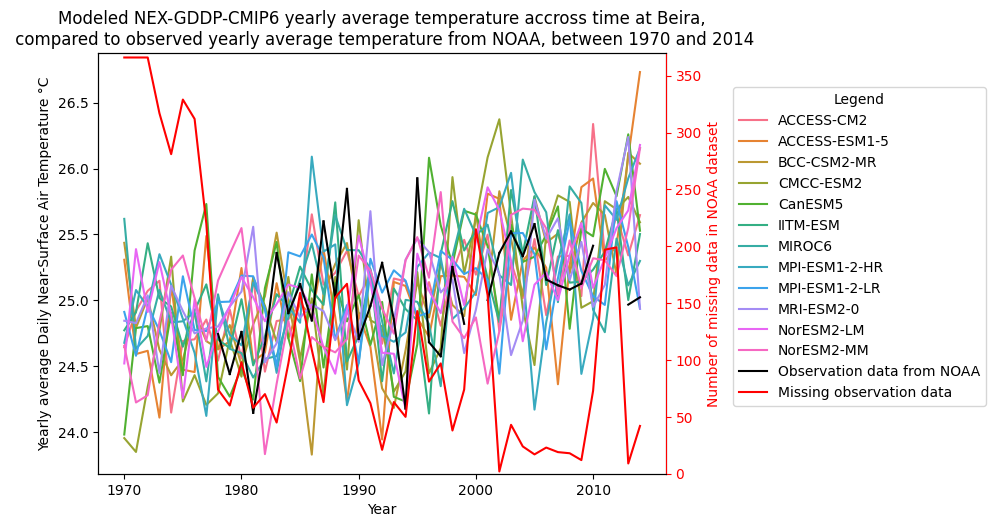

In [19]:
compare_3_lines('test','Mean','temperature',tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Beira,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [20]:
tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA

Date  Daily Near-Surface Air Temperature °C Name project  \
197168  1970-01-02                              22.899038    BEIRA, MZ   
197169  1970-01-03                              25.239509    BEIRA, MZ   
197170  1970-01-04                              24.597896    BEIRA, MZ   
197171  1970-01-05                              25.708613    BEIRA, MZ   
197172  1970-01-06                              25.081120    BEIRA, MZ   
...            ...                                    ...          ...   
394331  2014-12-27                              25.553111    BEIRA, MZ   
394332  2014-12-28                              27.170502    BEIRA, MZ   
394333  2014-12-29                              29.583539    BEIRA, MZ   
394334  2014-12-30                              30.788534    BEIRA, MZ   
394335  2014-12-31                              29.205938    BEIRA, MZ   

        Experiment       Model  Year Month Season  
197168  historical    IITM-ESM  1970   Jan  Humid  
197169  historical    IITM-ESM  1970   Jan  Humid  
197170  historical    IITM-ESM  1970   Jan  Humid  
197171  historical    IITM-ESM  1970   Jan  Humid  
197172  historical    IITM-ESM  1970   Jan  Humid  
...            ...         ...   ...   ...    ...  
394331  historical  ACCESS-CM2  2014   Dec  Humid  
394332  historical  ACCESS-CM2  2014   Dec  Humid  
394333  historical  ACCESS-CM2  2014   Dec  Humid  
394334  historical  ACCESS-CM2  2014   Dec  Humid  
394335  historical  ACCESS-CM2  2014   Dec  Humid  

[197168 rows x 8 columns]

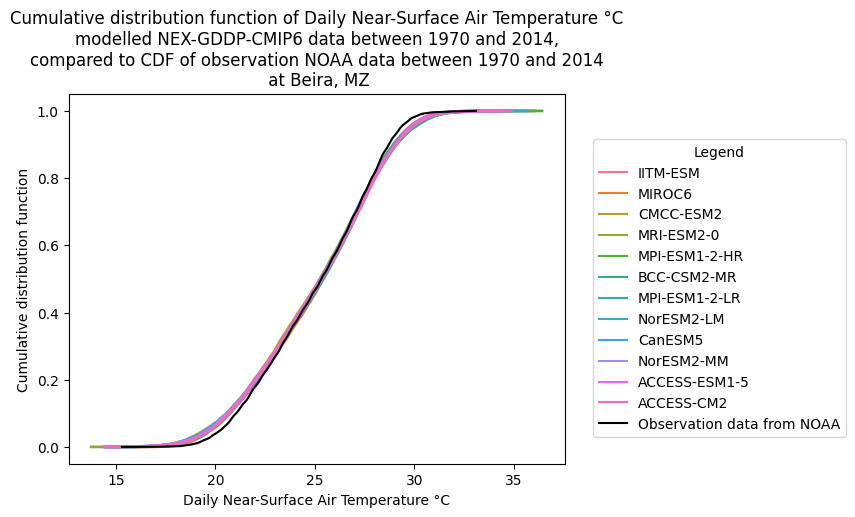

In [21]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Beira,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


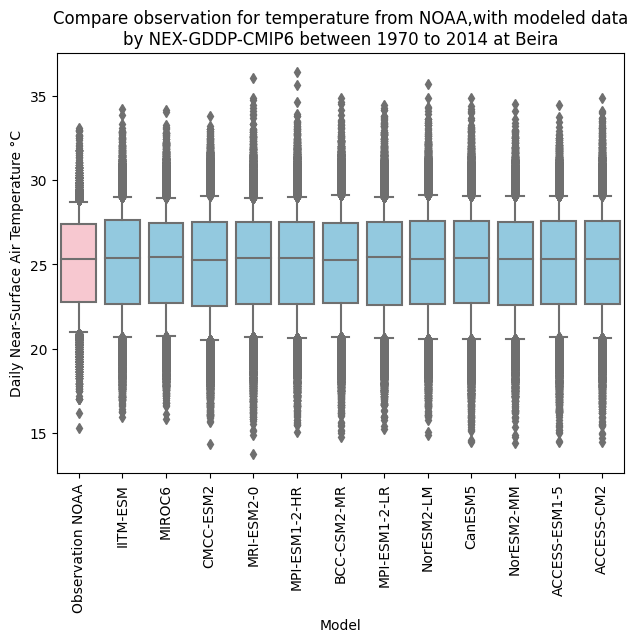

In [22]:
boxplots_('temperature',tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Near-Surface Air Temperature °C',df_obs_Beira,'TAVG','Beira')

In [23]:
# Chimoio

In [24]:
df_obs_Chimoio=daily_sum_obs_from_NOAA_CHIMOIO#[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1974,2014)]

missing data


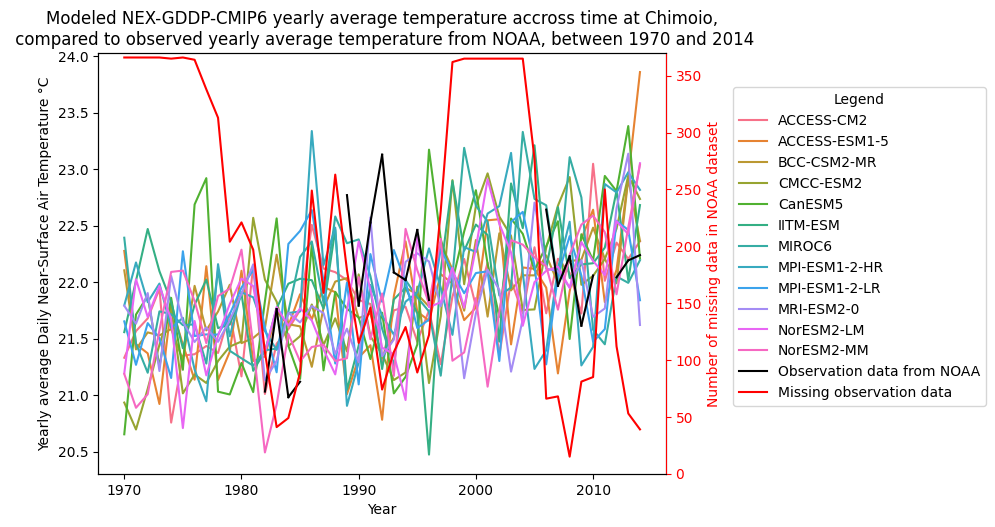

In [25]:
compare_3_lines('test','Mean','temperature',tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Chimoio,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

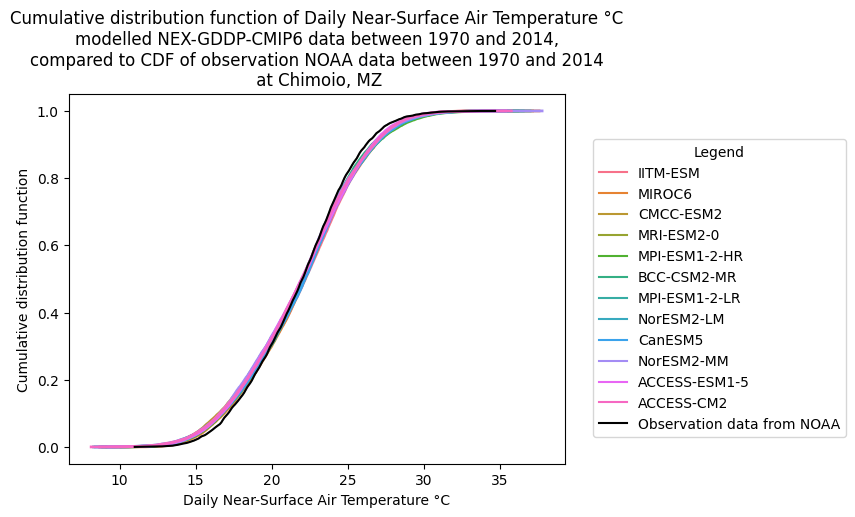

In [26]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Chimoio,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


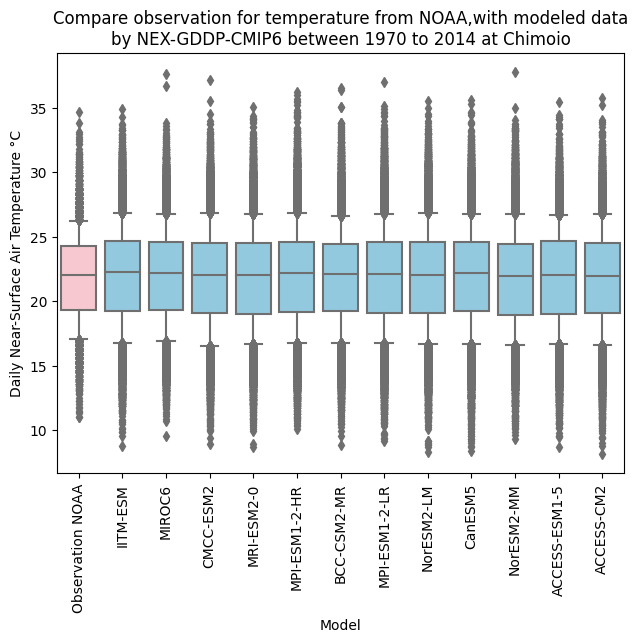

In [27]:
boxplots_('temperature',tas_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Near-Surface Air Temperature °C',df_obs_Chimoio,'TAVG','Chimoio')

## Maximum temperature

In [28]:
# beira

missing data


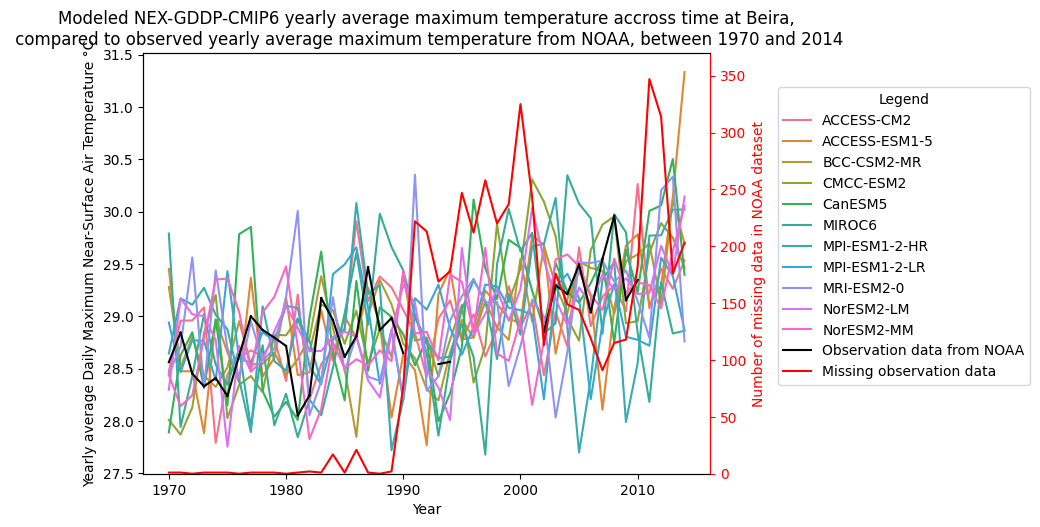

In [29]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

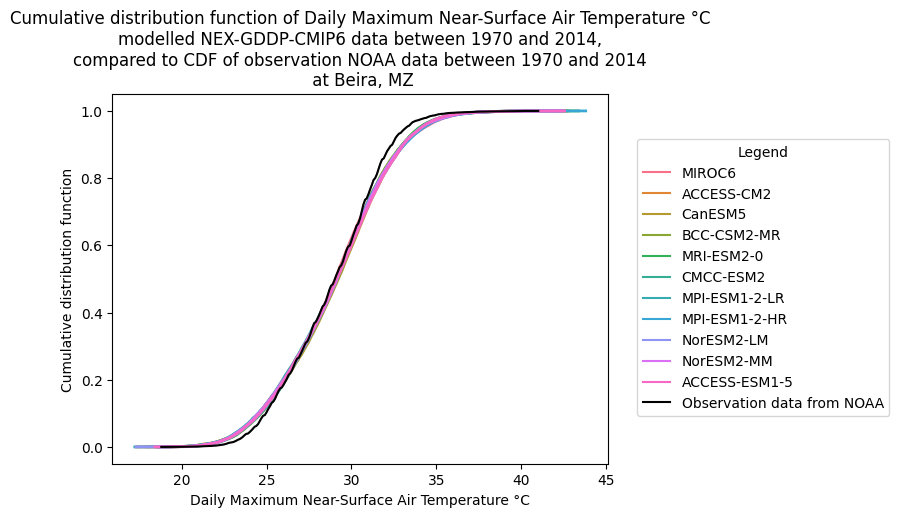

In [30]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


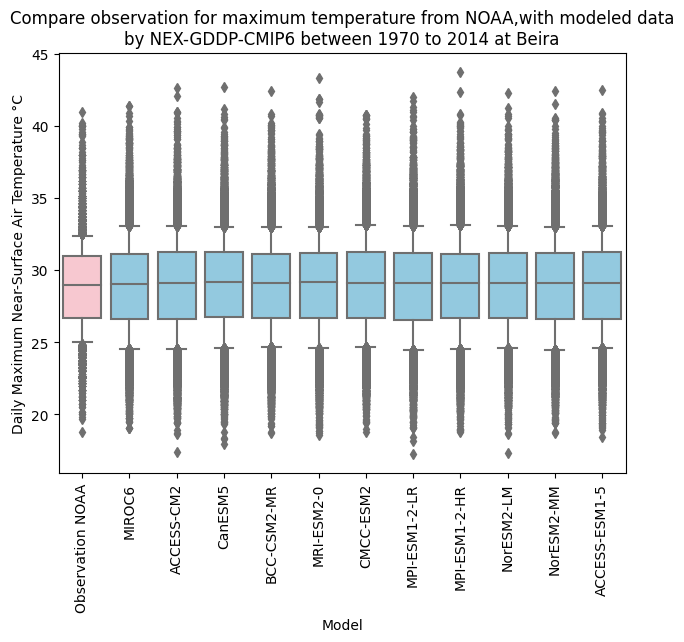

In [31]:
boxplots_('maximum temperature',tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

In [32]:
# chimoio

missing data


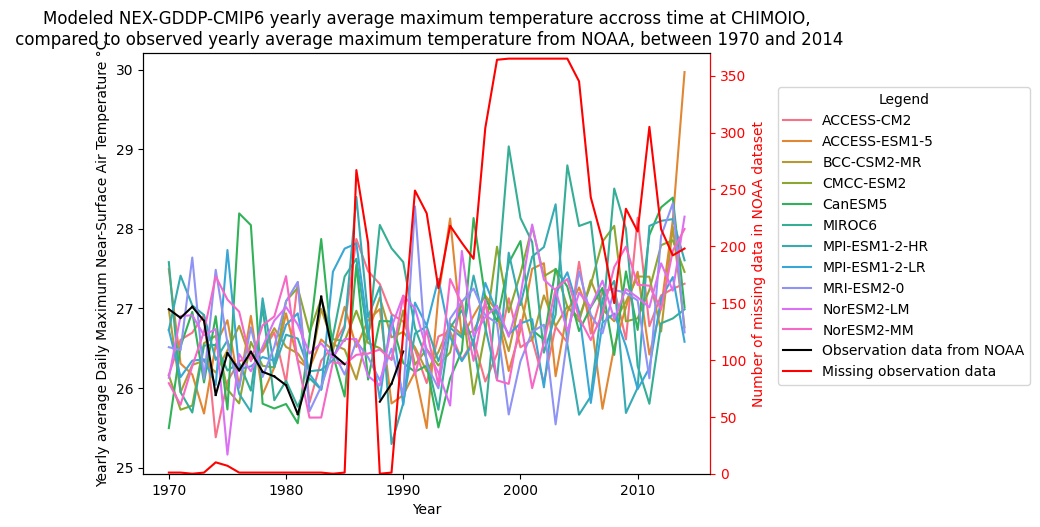

In [33]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

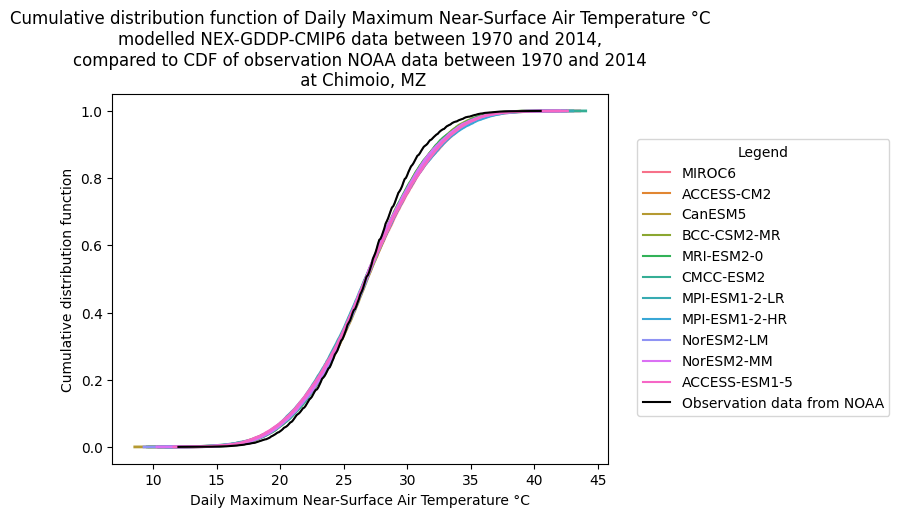

In [34]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


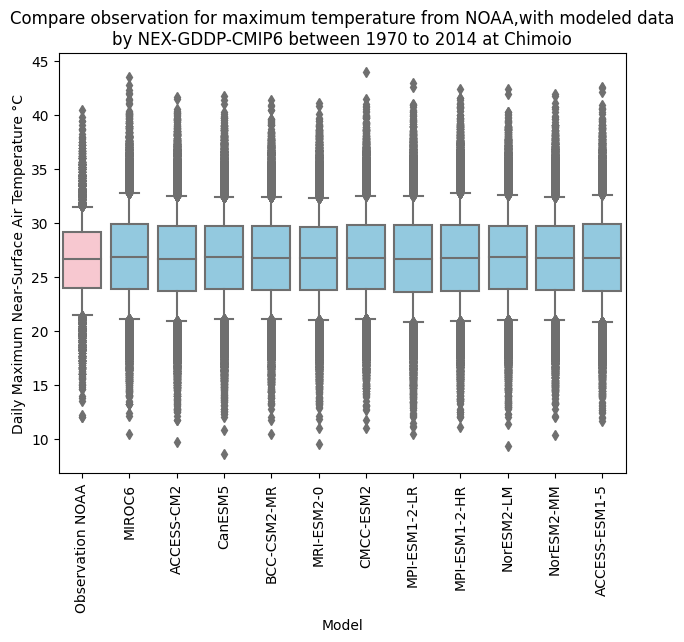

In [35]:
boxplots_('maximum temperature',tasmax_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Minimum temperature

In [36]:
# Beira

missing data


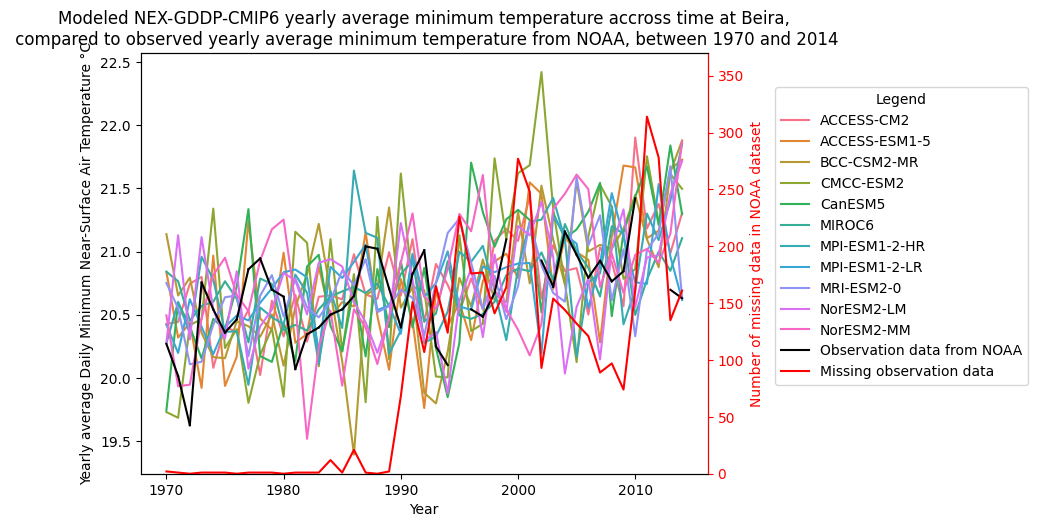

In [37]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Beira')

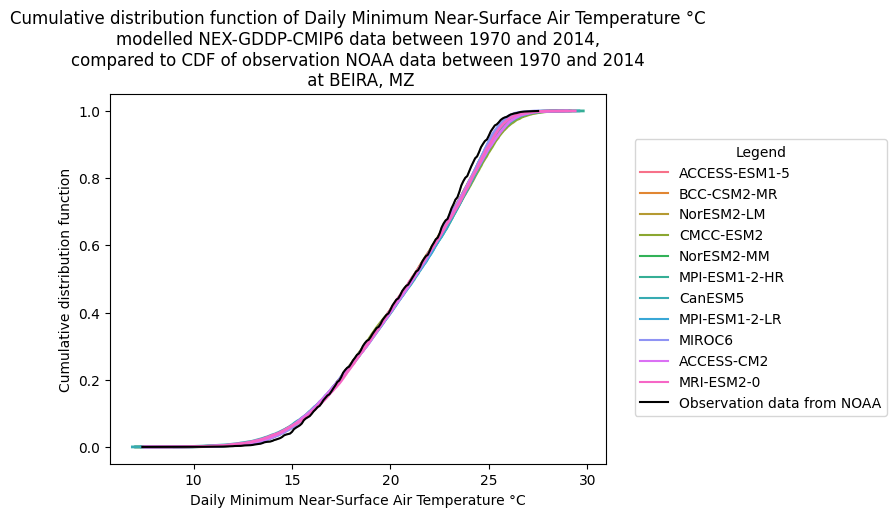

In [38]:
cdf_plot_category_or_obs('BEIRA, MZ',df_initial=tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMIN',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


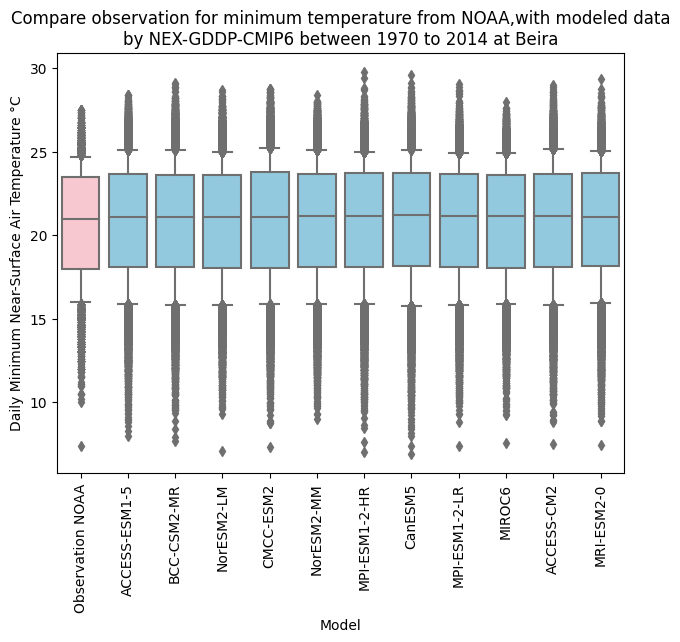

In [39]:
boxplots_('minimum temperature',tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','Beira')

In [40]:
# Chimoio

missing data


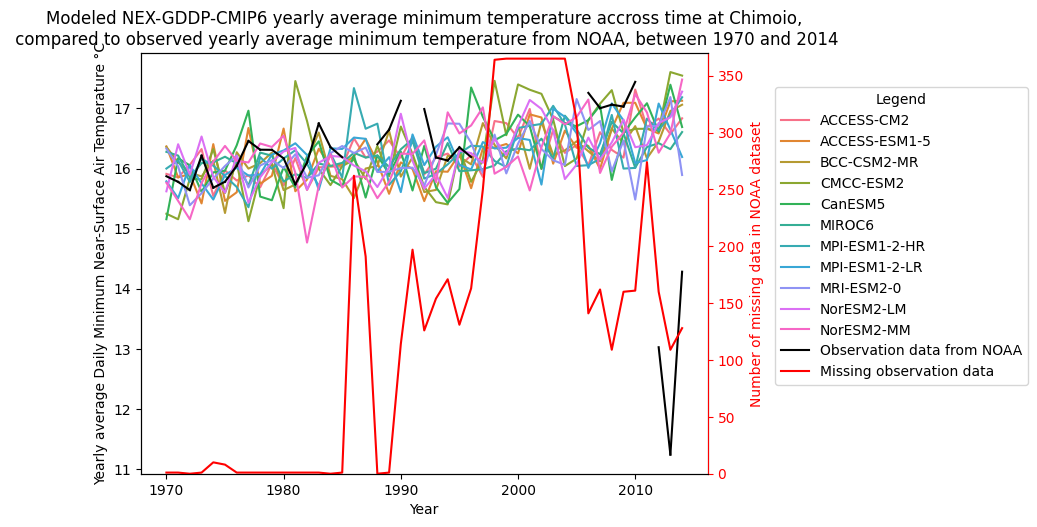

In [41]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

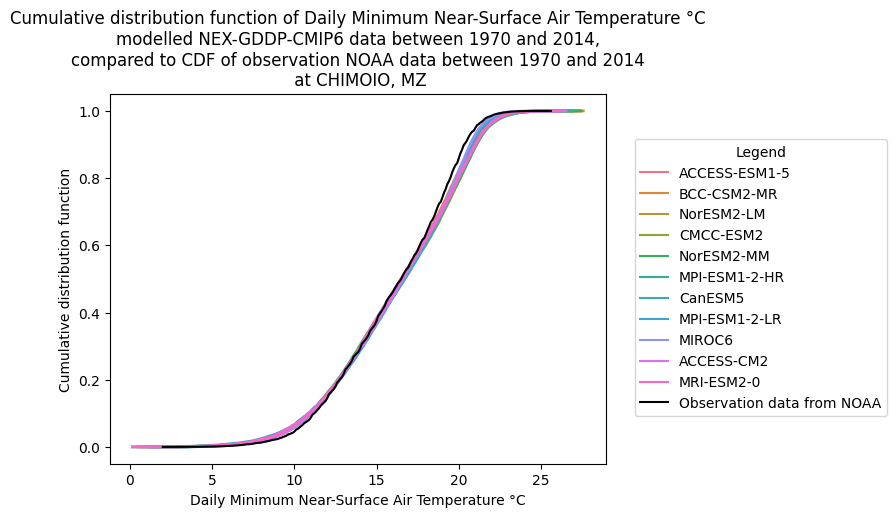

In [42]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


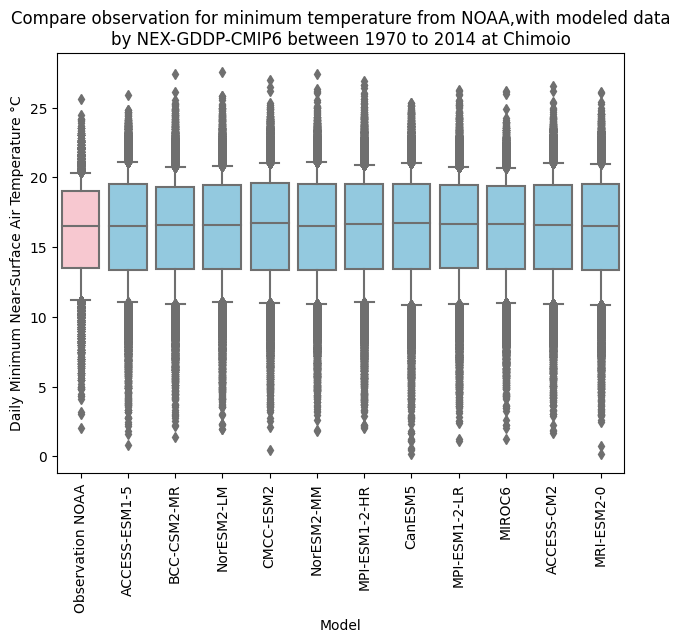

In [43]:
boxplots_('minimum temperature',tasmin_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

## Precipitation

In [44]:
# Beira

missing data


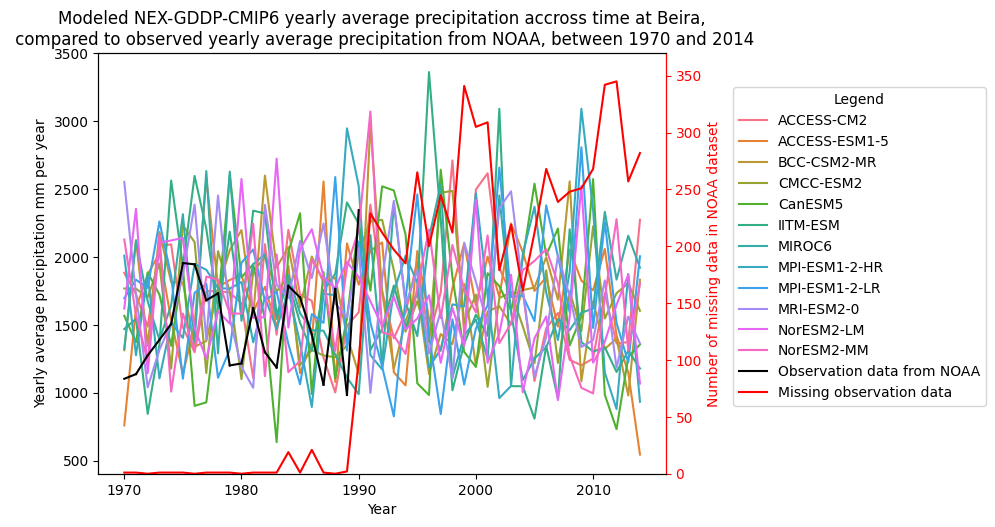

In [45]:
compare_3_lines('test','Mean','precipitation',pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

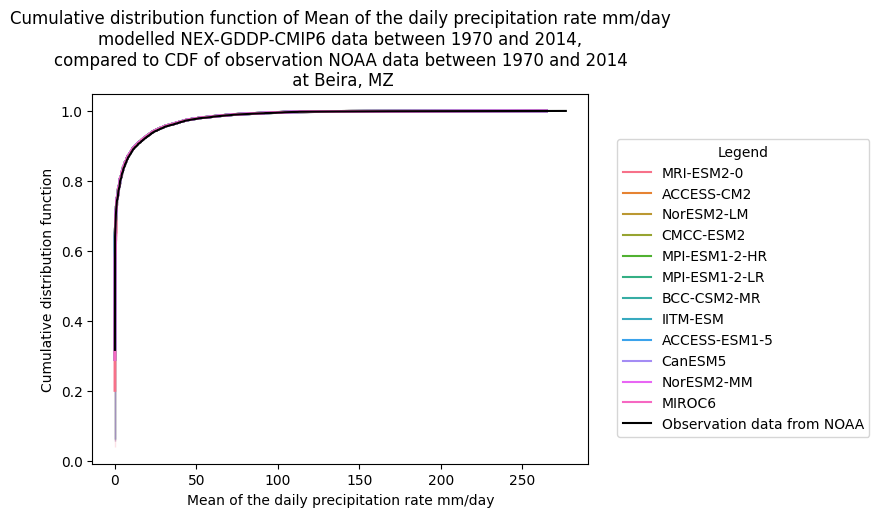

In [46]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

In [67]:
df_initial=pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA[['Model','Year','Mean of the daily precipitation rate mm/day']]
name_column_df='Mean of the daily precipitation rate mm/day'
source_df='NEX-GDDP-CMIP6'
category='Model'
obs_initial=daily_sum_obs_from_NOAA_BEIRA
name_column_obs='PRCP'
source_obs='NOAA'

In [69]:
# the dataframe given in this function should have a column named 'CDF'
def cdf_(df,name_column_df):
    df=df.sort_values(name_column_df,na_position='first').dropna() # sort the values
    df['CDF'] = np.arange(len(df[name_column_df])) / float(len(df[name_column_df]))
    return df

In [76]:
list(set(df[category]))#[5:10]

['MPI-ESM1-2-LR',
 'CanESM5',
 'ACCESS-CM2',
 'MPI-ESM1-2-HR',
 'ACCESS-ESM1-5',
 'IITM-ESM',
 'CMCC-ESM2',
 'BCC-CSM2-MR',
 'NorESM2-MM',
 'NorESM2-LM',
 'MIROC6',
 'MRI-ESM2-0']

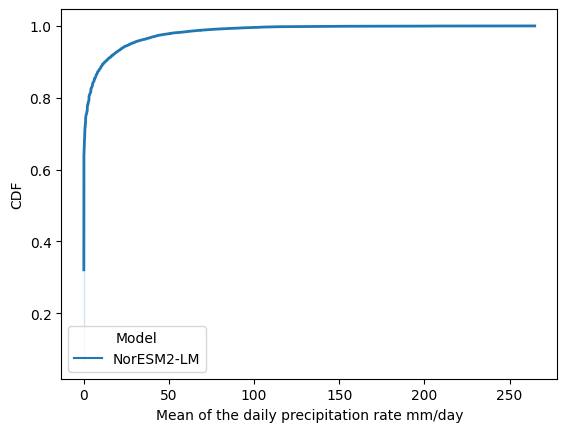

In [83]:
if not df_initial.empty:
    start_y_df = str(min(df_initial['Year']))
    stop_y_df = str(max(df_initial['Year']))
    if category == 'Model':
        model = 'NorESM2-LM'
        df = df_initial[[category,name_column_df]].copy(deep=True)
        df = df [df[category]==model]
        df['CDF']=df[name_column_df]

        #for model in ['CMCC-ESM2','BCC-CSM2-MR','NorESM2-MM','NorESM2-LM']:#list(set(df[category])):
        df= cdf_(df[df[category]==model],name_column_df)
        sns.lineplot(data=df,x=name_column_df,y='CDF',hue=category,errorbar =('pi',80), linewidth =2)

In [84]:
df

Model  Mean of the daily precipitation rate mm/day       CDF
434690  NorESM2-LM                                     0.000000  0.000000
435605  NorESM2-LM                                     0.000000  0.000061
435606  NorESM2-LM                                     0.000000  0.000122
435607  NorESM2-LM                                     0.000000  0.000183
435609  NorESM2-LM                                     0.000000  0.000244
...            ...                                          ...       ...
431298  NorESM2-LM                                   209.266055  0.999696
437434  NorESM2-LM                                   220.561468  0.999756
429458  NorESM2-LM                                   242.747706  0.999817
432392  NorESM2-LM                                   264.469495  0.999878
428367  NorESM2-LM                                   264.781980  0.999939

[16425 rows x 3 columns]

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


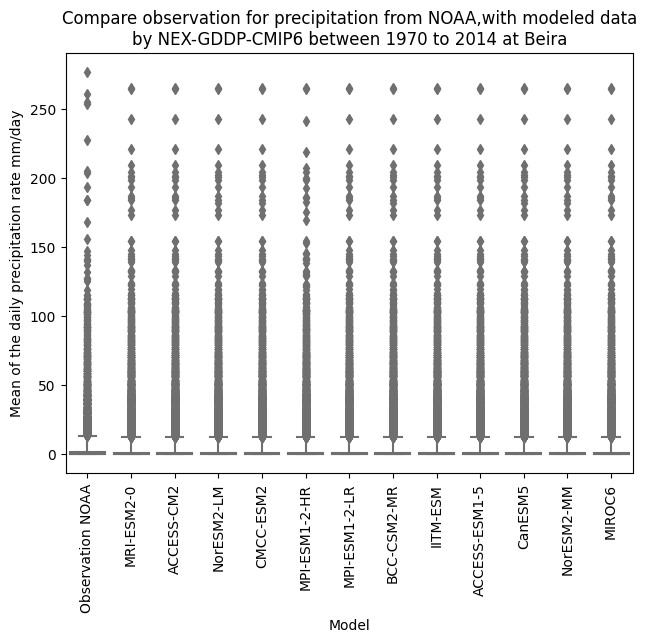

In [47]:
boxplots_('precipitation',pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_BEIRA,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [48]:
# Chimoio

missing data


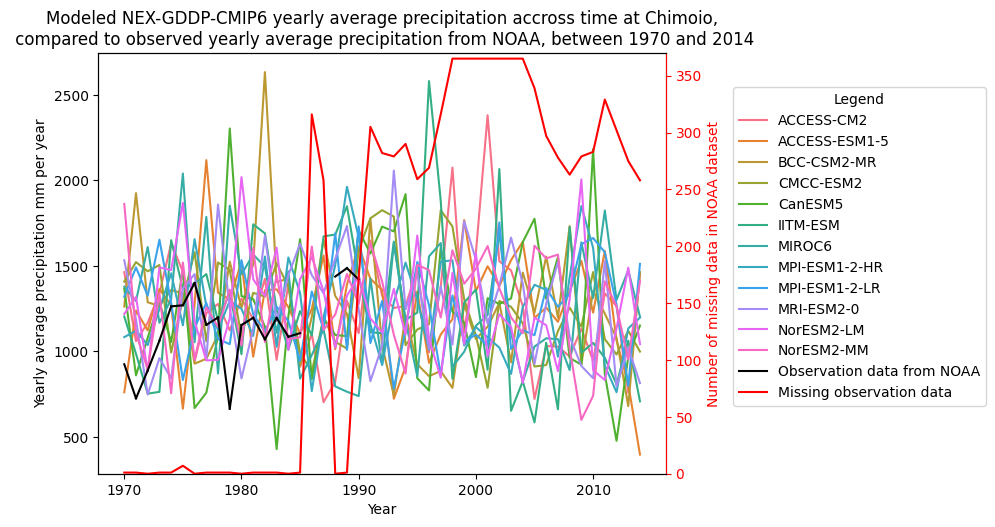

In [49]:
compare_3_lines('test','Mean','precipitation',pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

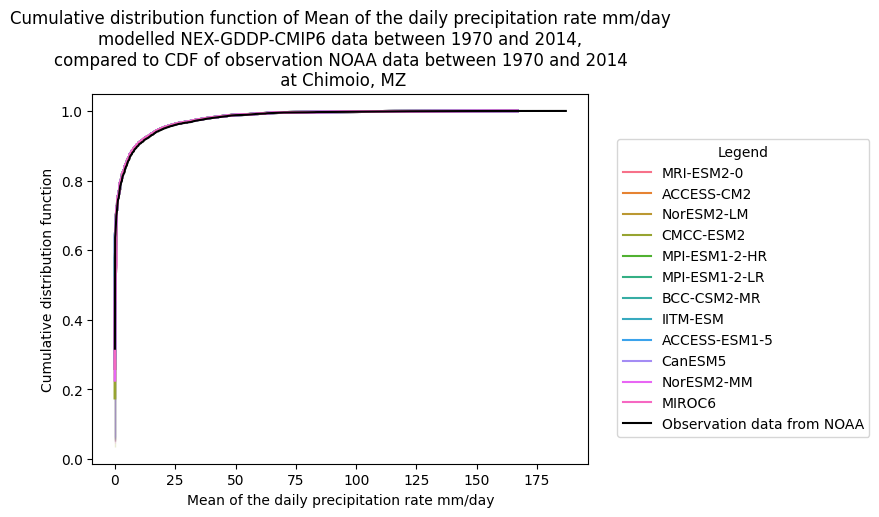

In [50]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


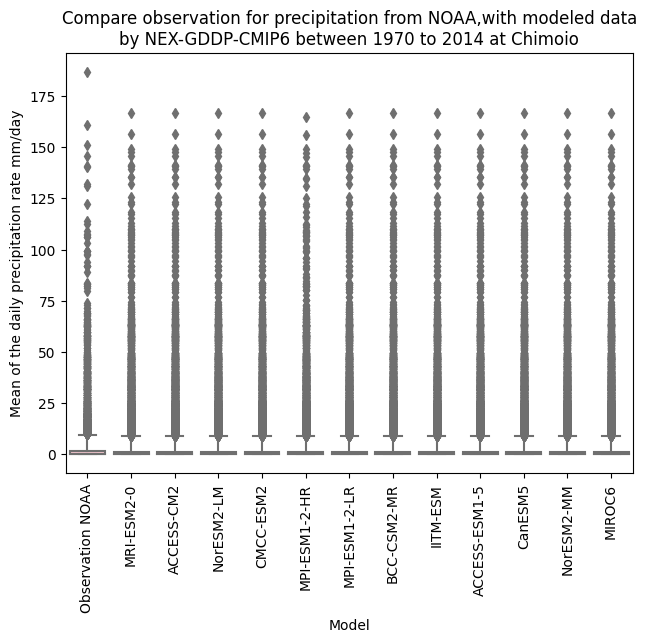

In [51]:
boxplots_('precipitation',pr_model_BC_NEX_GDDPCMIP6_to_comp_NOAA_past_CHIMOIO,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [52]:
# gorongosa

In [ ]:
# data corrected with NOAA data

missing data


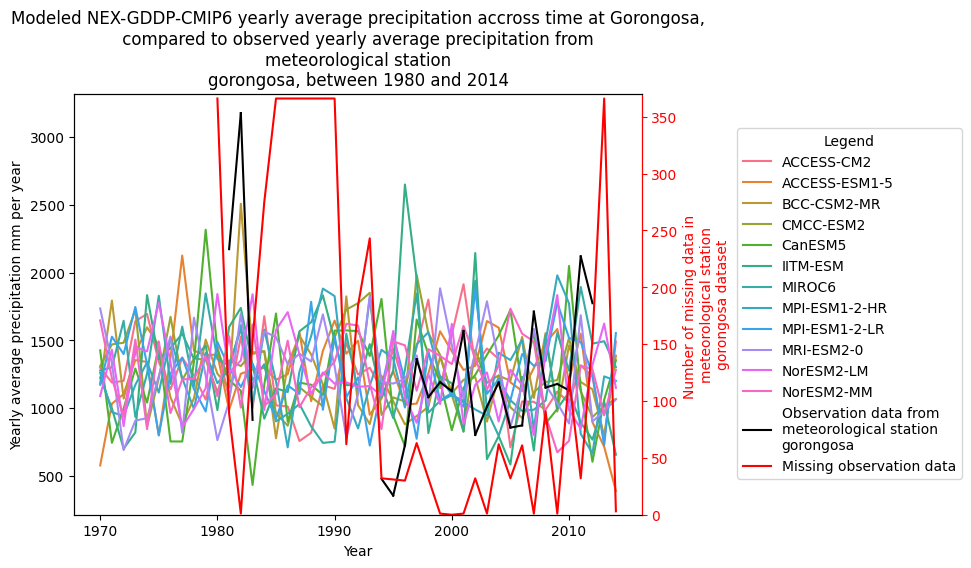

In [53]:
compare_3_lines('test','Mean','precipitation',pr_model_BC_NEX_GDDPCMIP6_past_Gorongosa,'Mean of the daily precipitation rate mm_per_day','NEX-GDDP-CMIP6',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','\nmeteorological station\ngorongosa','Yearly mean of the mean daily precipitation rate mm/day','Gorongosa')

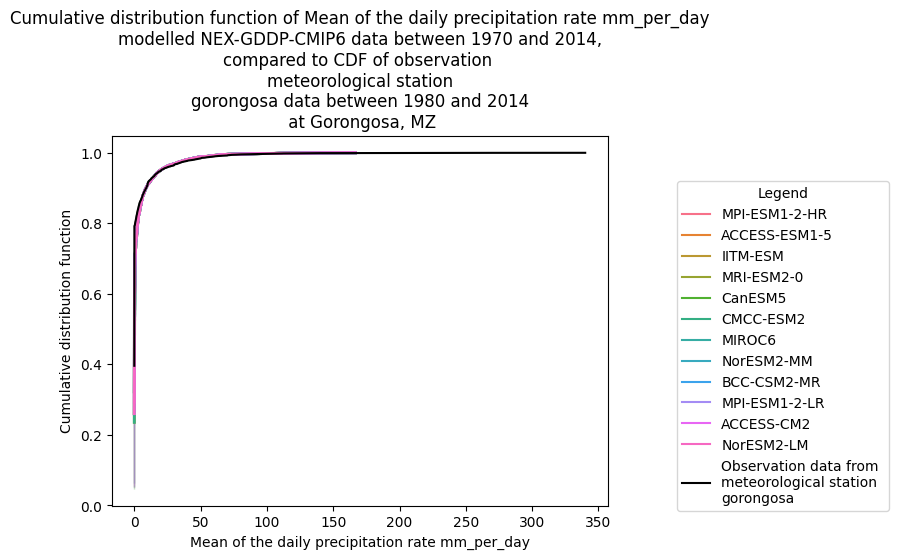

In [54]:
cdf_plot_category_or_obs('Gorongosa, MZ',df_initial=pr_model_BC_NEX_GDDPCMIP6_past_Gorongosa[['Model','Year','Mean of the daily precipitation rate mm_per_day']],name_column_df='Mean of the daily precipitation rate mm_per_day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=pr_obs_gorongosa_from_gorongosa_to_comp,name_column_obs='pr',source_obs='\nmeteorological station\ngorongosa')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


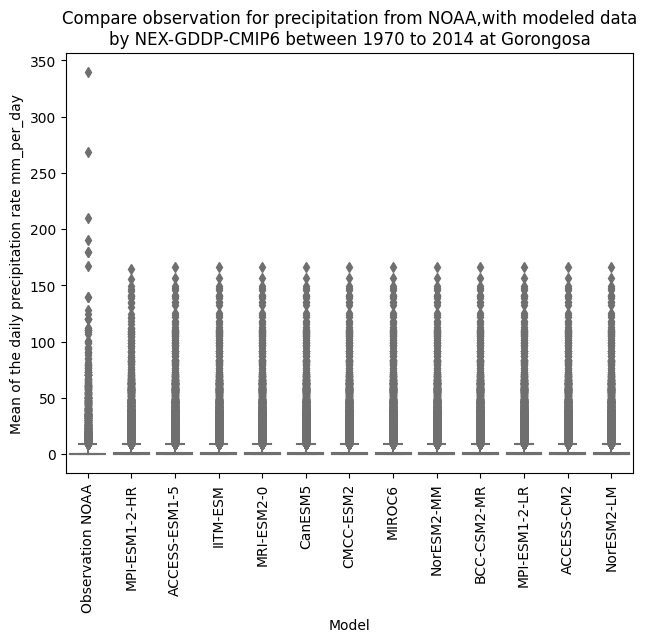

In [55]:
boxplots_('precipitation',pr_model_BC_NEX_GDDPCMIP6_past_Gorongosa,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')

In [58]:
# data corrected with gorongosa data

In [59]:
pr_model_BC_Gorongosa

Date  Mean of the daily precipitation rate mm_per_day  \
0       1980-01-01                                         0.000000   
1       1980-01-02                                         0.000000   
2       1980-01-03                                         0.000000   
3       1980-01-04                                         0.000000   
4       1980-01-05                                         0.000000   
...            ...                                              ...   
152986  2014-12-27                                         3.800000   
152987  2014-12-28                                         6.332745   
152988  2014-12-29                                         0.000000   
152989  2014-12-30                                         0.000000   
152990  2014-12-31                                         0.000000   

         Name project  Experiment          Model  Year Month Season  
0       Gorongosa_EIB  historical  MPI-ESM1-2-LR  1980   Jan  Humid  
1       Gorongosa_EIB  historical  MPI-ESM1-2-LR  1980   Jan  Humid  
2       Gorongosa_EIB  historical  MPI-ESM1-2-LR  1980   Jan  Humid  
3       Gorongosa_EIB  historical  MPI-ESM1-2-LR  1980   Jan  Humid  
4       Gorongosa_EIB  historical  MPI-ESM1-2-LR  1980   Jan  Humid  
...               ...         ...            ...   ...   ...    ...  
152986  Gorongosa_EIB  historical  MPI-ESM1-2-HR  2014   Dec  Humid  
152987  Gorongosa_EIB  historical  MPI-ESM1-2-HR  2014   Dec  Humid  
152988  Gorongosa_EIB  historical  MPI-ESM1-2-HR  2014   Dec  Humid  
152989  Gorongosa_EIB  historical  MPI-ESM1-2-HR  2014   Dec  Humid  
152990  Gorongosa_EIB  historical  MPI-ESM1-2-HR  2014   Dec  Humid  

[152991 rows x 8 columns]

missing data


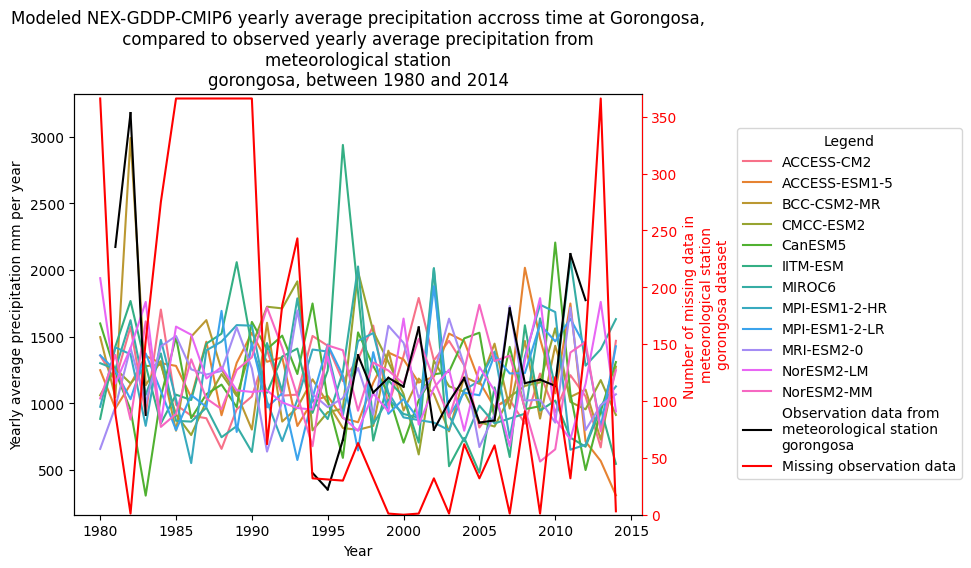

In [60]:
compare_3_lines('test','Mean','precipitation',pr_model_BC_Gorongosa,'Mean of the daily precipitation rate mm_per_day','NEX-GDDP-CMIP6',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','\nmeteorological station\ngorongosa','Yearly mean of the mean daily precipitation rate mm/day','Gorongosa')

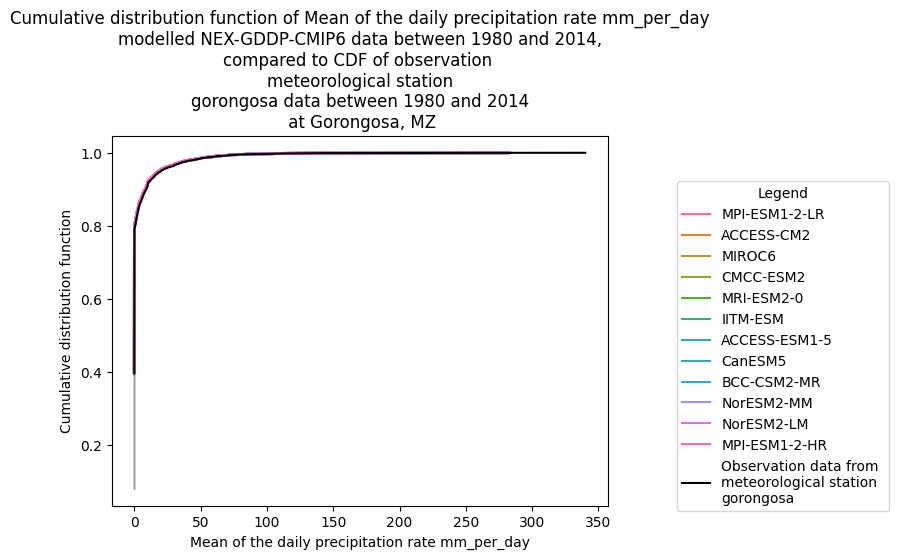

In [66]:
cdf_plot_category_or_obs('Gorongosa, MZ',df_initial=pr_model_BC_Gorongosa[['Model','Year','Mean of the daily precipitation rate mm_per_day']],name_column_df='Mean of the daily precipitation rate mm_per_day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=pr_obs_gorongosa_from_gorongosa_to_comp,name_column_obs='pr',source_obs='\nmeteorological station\ngorongosa')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


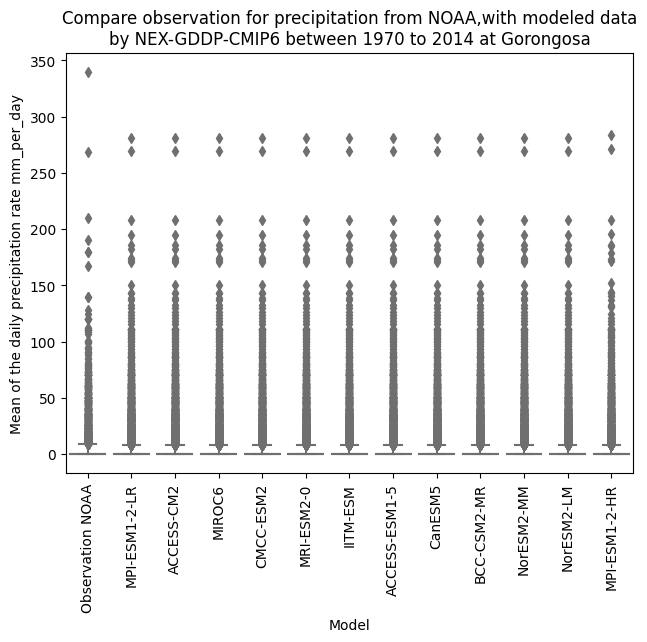

In [65]:
boxplots_('precipitation',pr_model_BC_Gorongosa,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')

In [56]:
# supprimer la suite ?

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable

In [57]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

NameError: name 'tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past' is not defined

In [ ]:
# take out models for average temperature
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for minimum temperature
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

## Temperature : take out some models

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

## Maximum temperature : take out some models (the ones that were not performing well for average temperature) from modelled data and some extreme values that are not plausible from observation data

In [ ]:
# take out models 
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean daily maximum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')